In [1]:
import tensorflow as tf

model = tf.keras.models.load_model('flower_classification_final_model_2.keras')

Found 46 images belonging to 5 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step 


c:\Users\laxim\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


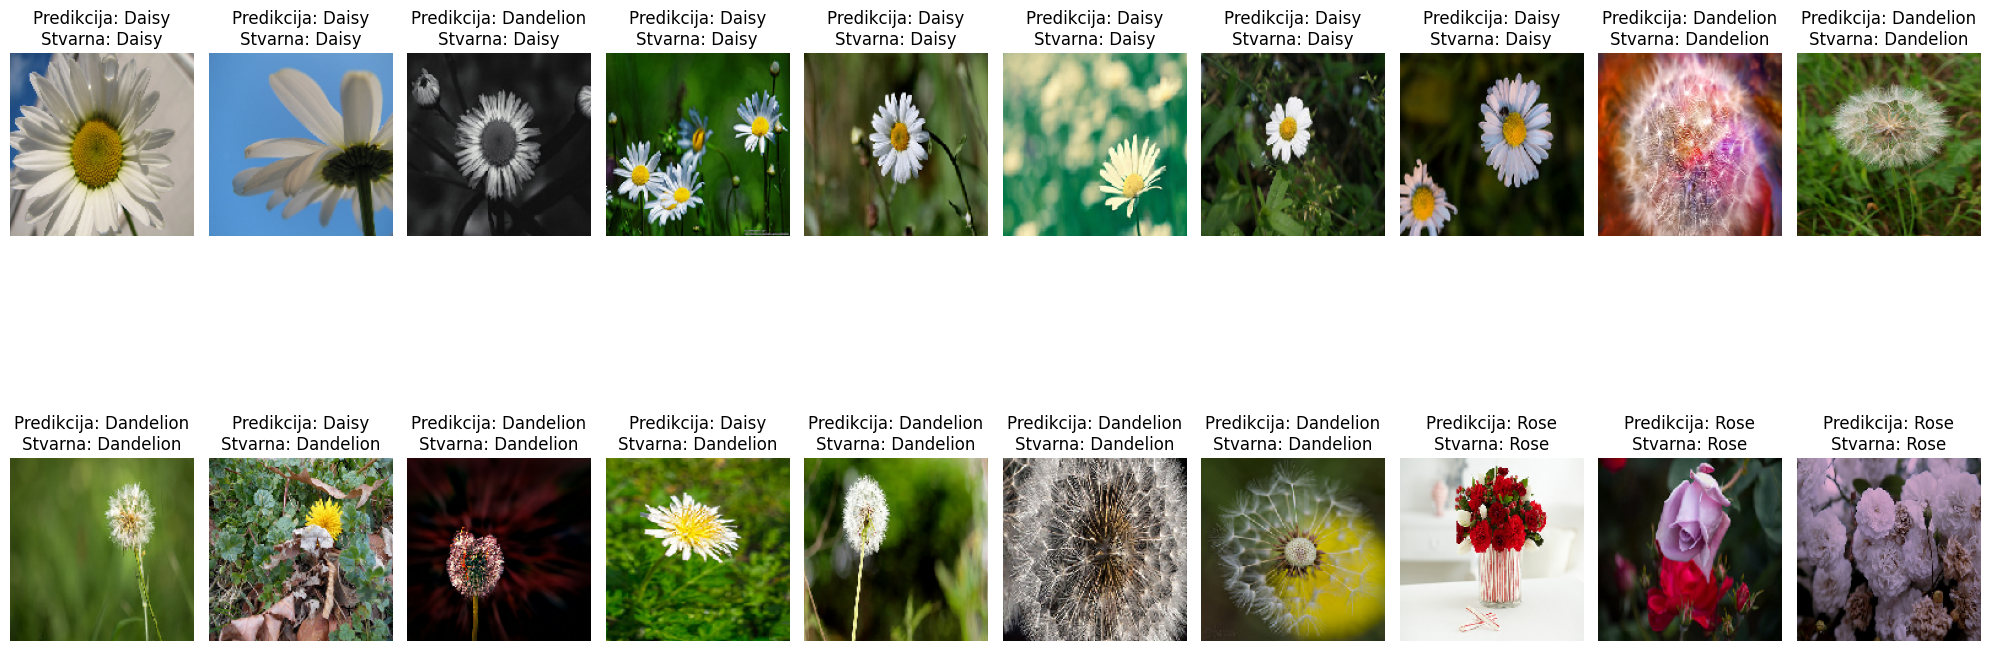

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.8125 - loss: 0.6717
Točnost modela na testnom skupu: 81.25%
Gubitak modela na testnom skupu: 0.6717


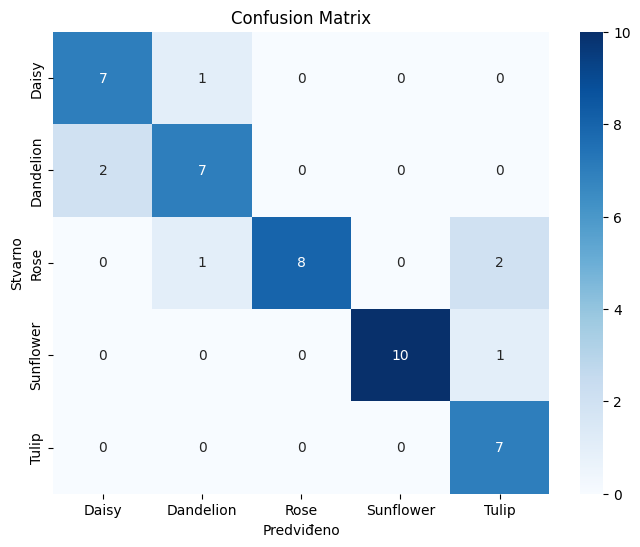

              precision    recall  f1-score   support

       Daisy       0.78      0.88      0.82         8
   Dandelion       0.78      0.78      0.78         9
        Rose       1.00      0.73      0.84        11
   Sunflower       1.00      0.91      0.95        11
       Tulip       0.70      1.00      0.82         7

    accuracy                           0.85        46
   macro avg       0.85      0.86      0.84        46
weighted avg       0.87      0.85      0.85        46



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

model = load_model('flower_classification_final_model_2.keras')

img_height, img_width = 150, 150
batch_size = 32

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'Test',                      
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False                 
)

Y_pred = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

class_labels = list(test_generator.class_indices.keys())

def plot_predictions(generator, predictions, class_labels, n_images=10):
    plt.figure(figsize=(20, 10))  
    

    images, labels = [], []
    for batch_images, batch_labels in generator:
        images.extend(batch_images)
        labels.extend(batch_labels)
        if len(images) >= n_images:
            break

    images = np.array(images)
    labels = np.array(labels)
    
    for i in range(n_images):
        plt.subplot(2, (n_images + 1) // 2, i + 1)  
        plt.imshow(images[i])  
        predicted_label = class_labels[predictions[i]]
        true_label = class_labels[labels[i].argmax()]
        plt.title(f"Predikcija: {predicted_label}\nStvarna: {true_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_predictions(test_generator, y_pred, class_labels, n_images=20)

test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Točnost modela na testnom skupu: {test_accuracy * 100:.2f}%')
print(f'Gubitak modela na testnom skupu: {test_loss:.4f}')

true_classes = test_generator.classes
cm = confusion_matrix(true_classes, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predviđeno')
plt.ylabel('Stvarno')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(true_classes, y_pred, target_names=class_labels))
